# Chapter1 - Introduction

Load python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

## 1.2 Initial Data Analysis

Load in the Pima Indians data

In [2]:
pima = pd.read_csv("data/pima.csv")
pima.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Construct numerical summary. In contrast to R, only numerical variables are summarized (but that's all of them here). Round improves the presentation but is not well controlled

In [3]:
pima.describe().round(1)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


Sort diastolic and show the first few values

In [4]:
pima['diastolic'].sort_values().head()

347    0
494    0
222    0
81     0
78     0
Name: diastolic, dtype: int64

Replace all the instances of zero in five variables with the missing value code. Python code neater than R here.

In [5]:
pima.replace({'diastolic' : 0, 'triceps' : 0, 'insulin' : 0, 'glucose' : 0, 'bmi' : 0}, np.nan, inplace=True)
pima.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Turn test into a categorical variable. Describe is not like R table.

In [6]:
pima['test'] = pima['test'].astype('category')
pima['test'] = pima['test'].cat.rename_categories(['Negative','Positive'])
pima['test'].describe()

count          768
unique           2
top       Negative
freq           500
Name: test, dtype: object

This produces output like R table.

In [7]:
pima['test'].value_counts()

Negative    500
Positive    268
Name: test, dtype: int64

Produce histogram using `seaborn`. Necessary to drop the missing values. The kernel density estimate is also plotted. (Warning message can be ignored)

/anaconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


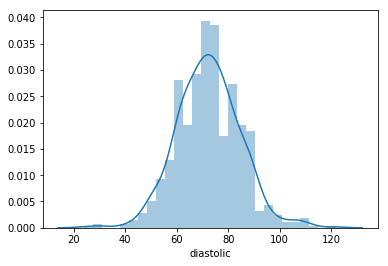

In [8]:
sns.distplot(pima.diastolic.dropna())

Sort data, remove missing values and make a line plot using an index created over the range of the observations.

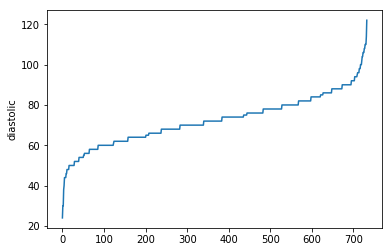

In [9]:
pimad = pima.diastolic.dropna().sort_values()
sns.lineplot(range(0, len(pimad)), pimad)

Scatter plot. Need to use smaller plotting character size with s=20.

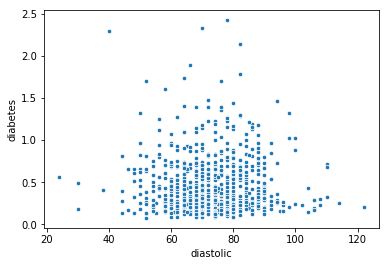

In [10]:
sns.scatterplot(x='diastolic',y='diabetes',data=pima, s=20)

Produces the boxplot using the `seaborn` package.

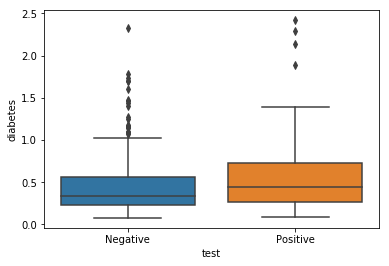

In [11]:
sns.boxplot(x="test", y="diabetes", data=pima)

We use some alpha transparency in the following plot to distinguish the different levels of test on the scatter plot of the two quantitative variables:

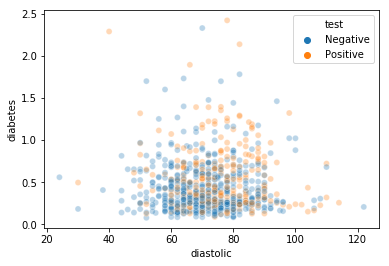

In [12]:
sns.scatterplot(x="diastolic", y="diabetes", data=pima, hue="test", alpha=0.3)

Can do faceting.

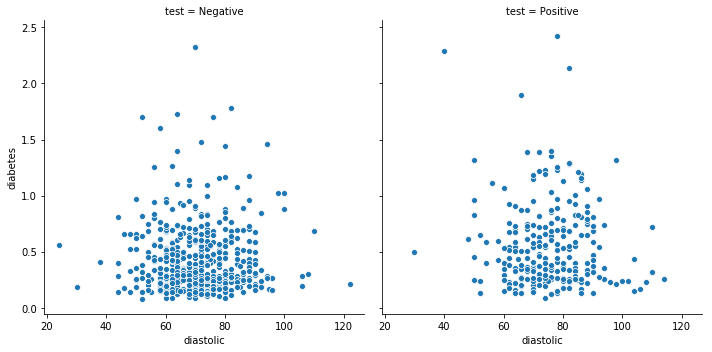

In [13]:
sns.relplot(x="diastolic", y="diabetes", data=pima, col="test")

## 1.4 History

Read in manilius data:

In [14]:
manilius = pd.read_csv("data/manilius.csv")
manilius.head()

,arc,sinang,cosang,group
0,13.166667,0.8836,-0.4682,1
1,13.133333,0.9996,-0.0282,1
2,13.200000,0.9899,0.1421,1
3,14.250000,0.2221,0.9750,3
4,14.700000,0.0006,1.0000,3


Do ancient calculation

In [15]:
moon3 = manilius.groupby('group')[['arc','sinang', 'cosang']].sum()
moon3

,arc,sinang,cosang
group,,,
1,118.133333,8.4987,-0.7932
2,140.283333,-6.1404,1.7443
3,127.533333,2.9777,7.9649


Add an intercept column

In [16]:
moon3['intercept'] = [9]*3
moon3

,arc,sinang,cosang,intercept
group,,,,
1,118.133333,8.4987,-0.7932,9
2,140.283333,-6.1404,1.7443,9
3,127.533333,2.9777,7.9649,9


Solve the linear equation:

In [17]:
np.linalg.solve(moon3[['intercept','sinang','cosang']],moon3['arc'])

array([14.54458591, -1.48982207,  0.13412639])

Can do linear models with R style formulae.

In [18]:
import statsmodels.formula.api as smf

In [19]:
mod = smf.ols(formula='arc ~ sinang + cosang', data=manilius)
res = mod.fit()
res.params

Intercept    14.561624
sinang       -1.504581
cosang        0.091365
dtype: float64

Read in family height data:

In [20]:
families = pd.read_csv("data/families.csv")
families.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5


Scatter plot - need to reduce point size with s=20

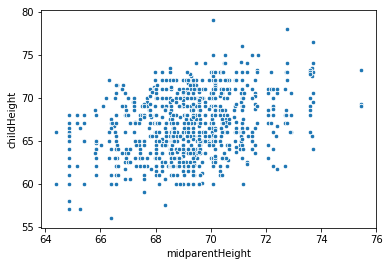

In [21]:
sns.scatterplot(x='midparentHeight', y='childHeight',data=families,s=20)

Calculate lm fit:

In [22]:
mod = smf.ols(formula='childHeight ~ midparentHeight', data=families)
res = mod.fit()
res.params

Intercept          22.636241
midparentHeight     0.637361
dtype: float64

Add the regression line to the plot. Seaborn's lmplot function does this automatically. We don't want the confidence intervals.

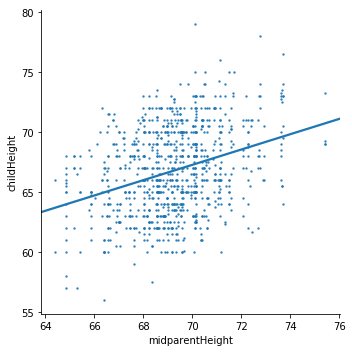

In [23]:
sns.lmplot('midparentHeight', 'childHeight', families, ci=None, scatter_kws={'s':2})

Calculate using the direct formulae.

In [24]:
cor = sp.stats.pearsonr(families['childHeight'],families['midparentHeight'])[0]
sdy = np.std(families['childHeight'])
sdx = np.std(families['midparentHeight'])
beta = cor*sdy/sdx
alpha = np.mean(families['childHeight']) - beta*np.mean(families['midparentHeight'])
np.round([alpha,beta],2)

array([22.64,  0.64])

Calculate the appropriate y=x line to show the regression effect. Python appears to lack a convenient abline() function as in R so we have to manually calculate the endpoints of the added line.

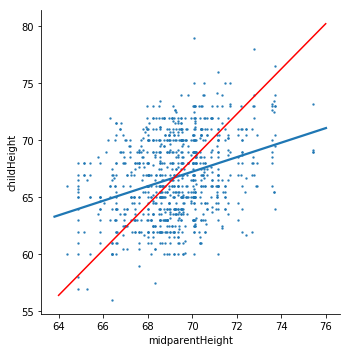

In [25]:
beta1 = sdy/sdx
alpha1 = np.mean(families['childHeight']) - beta1*np.mean(families['midparentHeight'])
sns.lmplot('midparentHeight', 'childHeight', families, ci=None, scatter_kws={'s':2})
xl,xu = [64, 76]
plt.plot([xl,xu], [alpha1+xl*beta1,alpha1+xu*beta1],c='Red')

In [29]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, scipy, patsy, statsmodels

Software,Version
Python,3.7.0 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython,6.5.0
OS,Darwin 17.7.0 x86_64 i386 64bit
pandas,0.23.4
numpy,1.15.1
matplotlib,2.2.3
seaborn,0.9.0
scipy,1.1.0
patsy,0.5.0
statsmodels,0.9.0
